In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout , BatchNormalization
import tensorflow as tf
from tensorflow import keras

In [5]:
# Create an instance of the ImageDataGenerator class and specify the desired transformations
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_data_gen = ImageDataGenerator(rescale = 1./255)

# Load the training data from directory and apply data augmentation
train_generator = train_datagen.flow_from_directory(
    'dataset/dogs_vs_cats/train',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)
test_generator = test_data_gen.flow_from_directory(
    'dataset/dogs_vs_cats/test',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
# Create a CNN model with batch normalization and dropout layers
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model and train it using the training generator
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history = model.fit(train_generator, epochs = 50, validation_data = test_generator)


Epoch 1/50
625/625 [==============================] - 840s 1s/step - loss: 0.7542 - accuracy: 0.6239 - val_loss: 0.6131 - val_accuracy: 0.6696
Epoch 2/50
625/625 [==============================] - 794s 1s/step - loss: 0.5629 - accuracy: 0.7153 - val_loss: 0.5658 - val_accuracy: 0.6998
Epoch 3/50
625/625 [==============================] - 733s 1s/step - loss: 0.4814 - accuracy: 0.7736 - val_loss: 0.3876 - val_accuracy: 0.8236
Epoch 4/50
625/625 [==============================] - 780s 1s/step - loss: 0.4089 - accuracy: 0.8170 - val_loss: 0.4296 - val_accuracy: 0.7954
Epoch 5/50
625/625 [==============================] - 865s 1s/step - loss: 0.3574 - accuracy: 0.8402 - val_loss: 0.4236 - val_accuracy: 0.8262
Epoch 6/50
625/625 [==============================] - 738s 1s/step - loss: 0.3321 - accuracy: 0.8550 - val_loss: 0.2642 - val_accuracy: 0.8870
Epoch 7/50
625/625 [==============================] - 726s 1s/step - loss: 0.3091 - accuracy: 0.8666 - val_loss: 0.3462 - val_accuracy: 0.8452

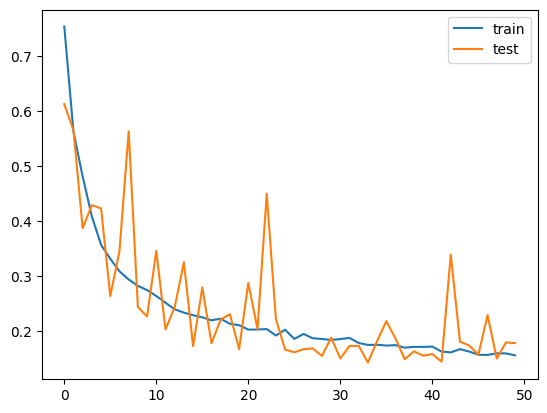

In [12]:
#loss history for train and test with labels
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

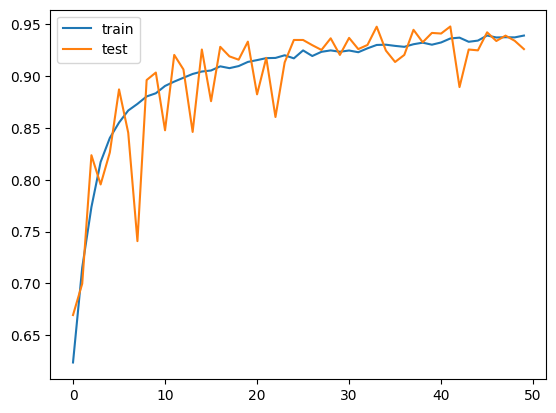

In [13]:
#accuracy history for train and test
plt.plot(history.history['accuracy'],label="train")
plt.plot(history.history['val_accuracy'],label="test")
plt.legend()
plt.show()

In [16]:
model.save("cat_vs_dog.h5")

In [18]:
#predict a cat from test data
import numpy as np
import keras.utils as image
test_image = image.load_img('dataset/dogs_vs_cats/test/cats/cat.1500.jpg', target_size = (150, 150))
# Convert the image to a numpy array and normalize its pixel values
x = image.img_to_array(test_image) / 255.0
# Reshape the array to match the input shape of the model
x = np.expand_dims(x, axis=0)
result = model.predict(x)


# Print the loaded test image
print("Loaded test image:")
test_image.show()

# Print the predicted class label (cat or dog)
if result < 0.5:
    print("This is a cat!")
else:
    print("This is a dog!")


1/1 [==============================] - 0s 29ms/step
Loaded test image:
This is a cat!
